### Analisis de los datos de **Homicidio**
- Hechos o ***siniestro vial***
- Victimas
- Fechas unicas **2016, 2017, 2018, 2019, 2020, 2021**
- El dataframe **Hechos** Contiene 21 columnas **``(696, 21)``**
- El dataframe **victimas** contiene 10 columnas **``(717, 10)``**
- Analizar la relación que tiene el dataframe **hechos** y **victimas**
- Unir los dataframes en uno nuevo llamado ***Homicidio***
- Eliminar columnas **x** y renombrar las que se usaran
- El dataframe **Homicidio** tiene **``(717, 25)``** 717 filas y 25 columnas
- Tratar los valores faltantes del dataframe
- Cambiar los tipos de datos de las variables

Empezaremos clasificando las varibles por cuantitativas y cualitativas (categoricas y continuas) del dataframes **Homicidios**

La clasificación de las variables son las siguientes:

**Variables Categóricas:**
1. TIPO_DE_CALLE
2. VICTIMA
3. ACUSADO
4. PARTICIPANTES
5. ROL
6. SEXO

**Variables Continuas:**
1. ID
2. N_VICTIMAS
3. FECHA
4. AAAA
5. MM
6. DD
7. HORA
8. HH
9. Altura
10. XY (CABA)
11. pos x
12. pos y
13. EDAD
14. FECHA_FALLECIMIENTO

**Variables Mixtas:**
1. LUGAR_DEL_HECHO
2. Calle
3. Cruce
4. Dirección Normalizada
5. COMUNA

In [1]:
import pandas as pd

In [14]:
# abrir el archivo CSV
hechos= pd.read_csv('Homicidios\Hechos.csv')

In [15]:
victimas= pd.read_csv('Homicidios\Victimas.csv')

In [16]:
# renombrar la columna ID_hecho' a ID
victimas.rename(columns={'ID_hecho':'ID'}, inplace=True)

In [17]:
# unir el dataframe hechos y victimas con la columna 'ID' como clave
Homicidios = pd.merge(hechos, victimas, on='ID', how='inner')

In [18]:
Homicidios.head()

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,AUTO,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,PASAJEROS,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,AUTO,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,SD,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,NaN
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,PASAJEROS,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01


In [19]:
# eliminar las columnas FECHA_y, AAAA_y, MM_y, DD_y y VICTIMA_x
Homicidios.drop(['FECHA_y', 'AAAA_y', 'MM_y', 'DD_y', 'VICTIMA_x'], axis=1, inplace=True)

In [20]:
# renombramos las columnas FECHA_x, AAAA_x, MM_x, DD_x y VICTIMA_y
Homicidios.rename(columns={'FECHA_x':'FECHA', 'AAAA_x':'AAAA', 'MM_x':'MM', 'DD_x':'DD', 'VICTIMA_y':'VICTIMA'}, inplace=True)

In [21]:
Homicidios.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02


- Ver valores nulos y SD (sin datos)
- Ver duplicados


### Valores faltantes del dataframe **Homicidios**

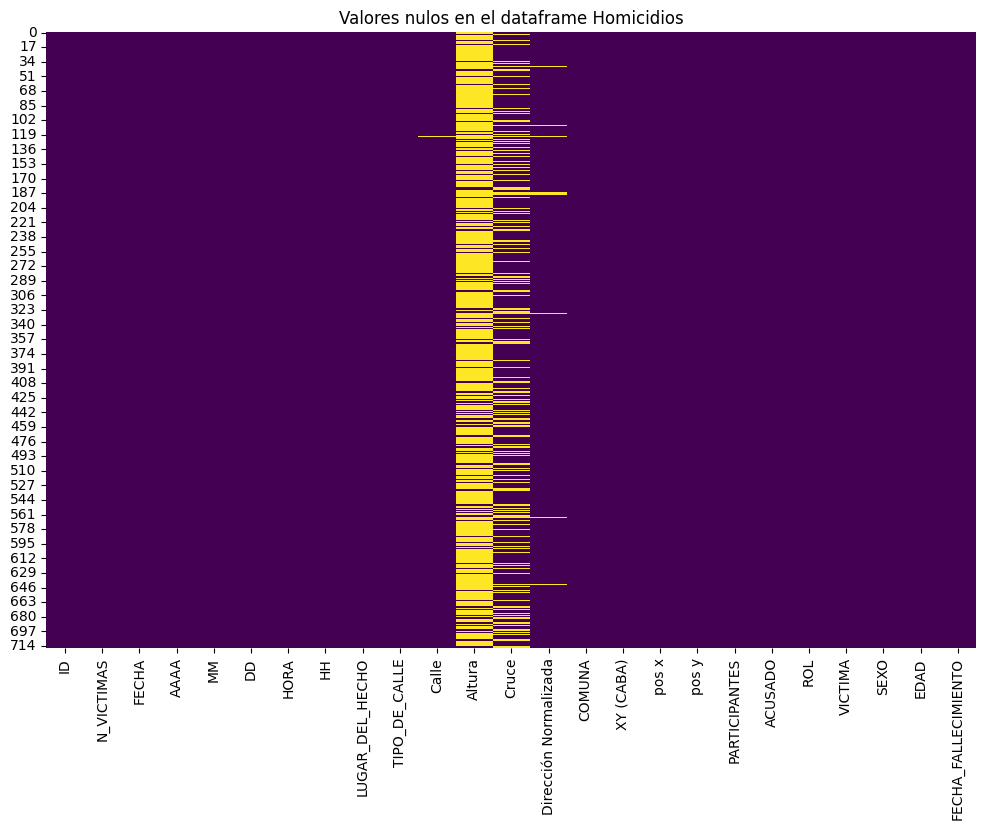

In [80]:
plt.figure(figsize=(12, 8))
sns.heatmap(Homicidios.isnull(), cbar=False, cmap='viridis')
plt.title('Valores nulos en el dataframe Homicidios')
plt.show()

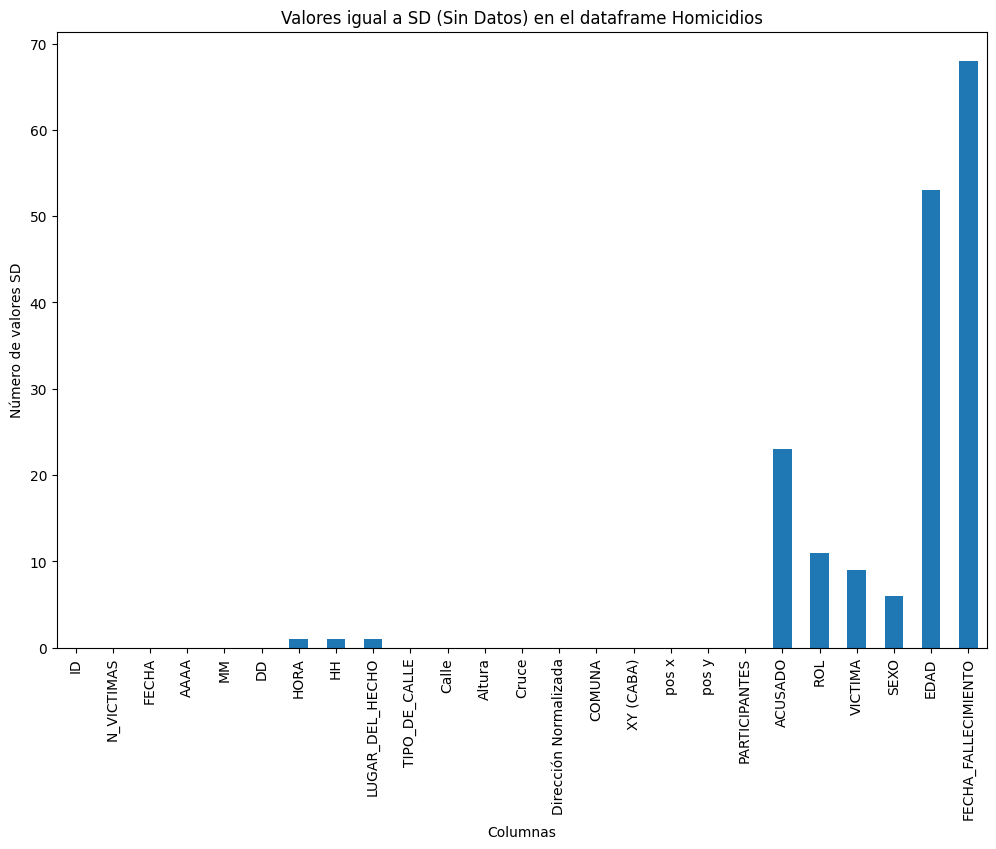

In [81]:
import matplotlib.pyplot as plt

# Count the number of occurrences of "SD" in each column
sd_counts = (Homicidios == "SD").sum()

# Plot the counts
plt.figure(figsize=(12, 8))
sd_counts.plot(kind='bar')
plt.title('Valores igual a SD (Sin Datos) en el dataframe Homicidios')
plt.xlabel('Columnas')
plt.ylabel('Número de valores SD')
plt.show()

In [82]:
duplicates = Homicidios.duplicated()
duplicates.sum()

0

In [83]:
Homicidios.describe()

,N_VICTIMAS,AAAA,MM,DD,Altura,COMUNA
count,717.000000,717.000000,717.000000,717.000000,133.000000,717.000000
mean,1.061367,2018.174338,6.688982,15.953975,3384.187970,7.430962
std,0.257024,1.672655,3.575140,8.674876,3095.161836,4.385067
min,1.000000,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,1366.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,2639.000000,8.000000
75%,1.000000,2019.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,16080.000000,15.000000


### **Interpretación** de la estadística descriptiva del dataframes **Homicidios**
> El análisis estadístico revela importantes detalles sobre los datos recopilados en el informe:

count: Esta métrica muestra la cantidad de valores no nulos presentes en cada columna del conjunto de datos. Por ejemplo, la columna N_VICTIMAS registra 717 incidentes en total, mientras que la columna Altura solo cuenta con 133 registros, lo que sugiere que la información de altura está ausente en muchos casos.

mean: Representa el promedio de los valores en cada columna. Por ejemplo, la media de N_VICTIMAS es de aproximadamente 1.06, lo que indica que, en promedio, cada incidente involucra alrededor de una víctima. Además, la media para el año (AAAA), mes (MM), día (DD) y comuna (COMUNA) varía según los años y meses registrados. Para la altura, la media es de aproximadamente 3384.19.

std: La desviación estándar mide la dispersión de los valores alrededor de la media. Por ejemplo, la desviación estándar de N_VICTIMAS es de aproximadamente 0.26, lo que indica cierta variabilidad en la cantidad de víctimas por incidente. Las desviaciones estándar para las otras variables también reflejan la dispersión de los datos.

min: Este valor mínimo en cada columna representa los registros más bajos. Por ejemplo, el valor mínimo de N_VICTIMAS es 1, indicando que el menor número de víctimas registrado en un incidente es 1. Los mínimos para las fechas corresponden a las fechas más tempranas registradas, y para la altura, indican la altura mínima registrada.

25%, 50%, 75%: Estos percentiles indican los valores por debajo de los cuales se encuentran el 25%, 50% y 75% de los datos, respectivamente. Por ejemplo, el primer cuartil de N_VICTIMAS es 1, lo que significa que el 25% de los incidentes involucran 1 o menos víctimas. La mediana de N_VICTIMAS es 1, indicando que el 50% de los incidentes tienen 1 o menos víctimas. El tercer cuartil de N_VICTIMAS es 1, mostrando que el 75% de los incidentes tienen 1 o menos víctimas.

max: Este valor máximo en cada columna representa los registros más altos. Por ejemplo, el valor máximo de N_VICTIMAS es 3, indicando que el mayor número de víctimas registrado en un incidente es 3. Los máximos para las fechas representan las fechas más recientes registradas, y para la altura, indican la altura máxima registrada. Estos datos son esenciales para comprender la distribución y la gama de los valores en cada columna del conjunto de datos analizado.

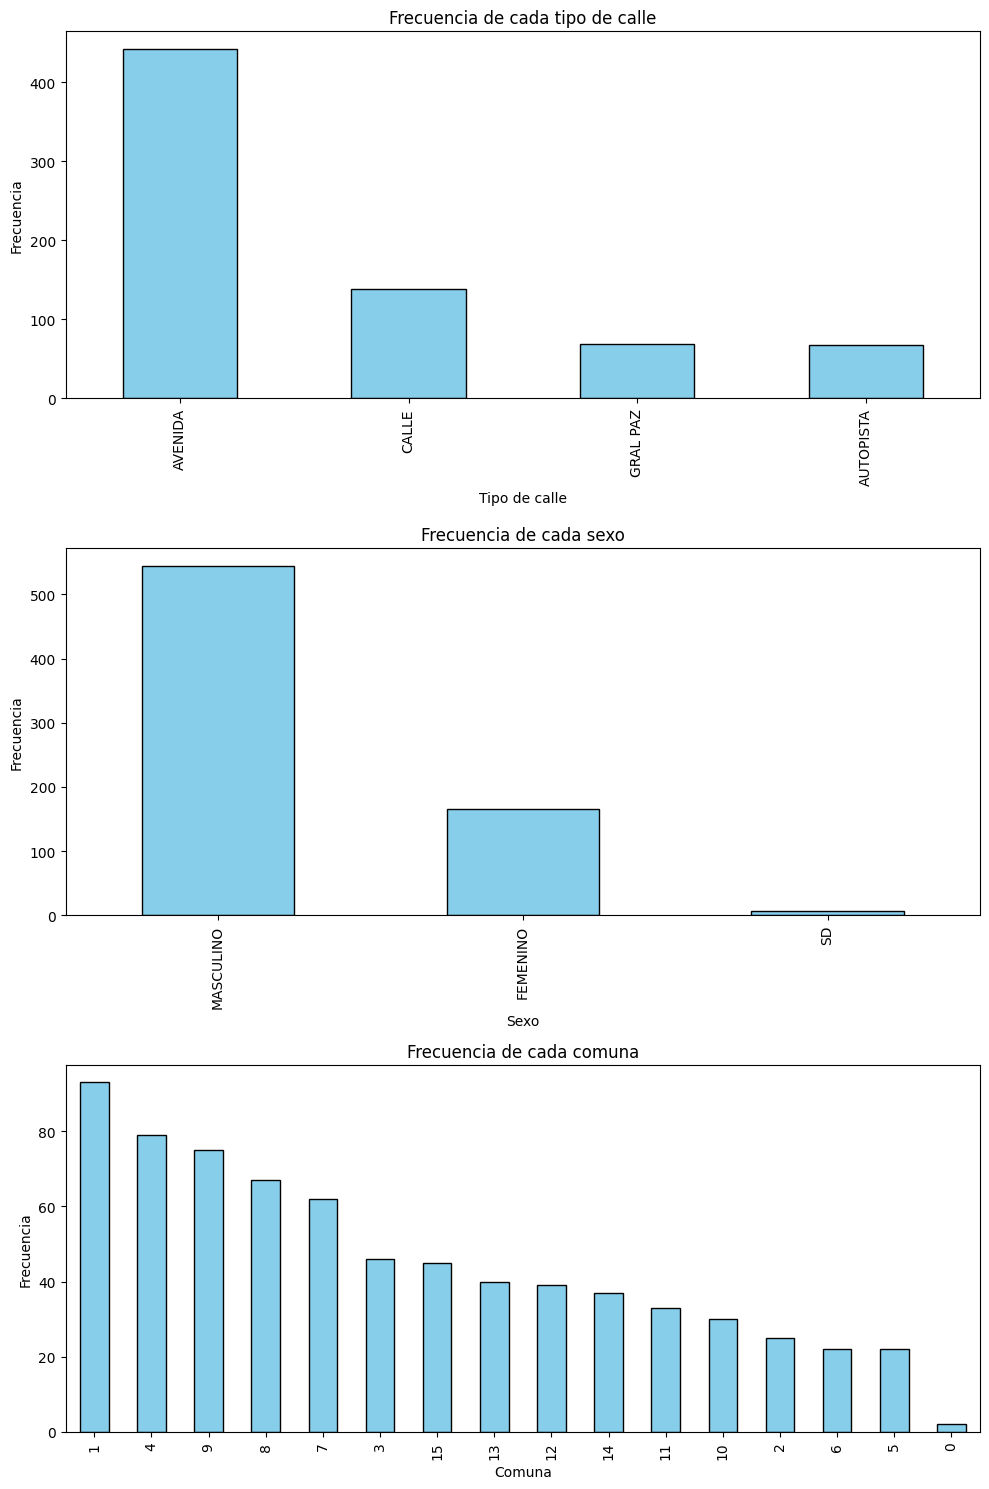

In [84]:
# Calcular las frecuencias
frecuencia_calle = Homicidios['TIPO_DE_CALLE'].value_counts()
frecuencia_sexo = Homicidios['SEXO'].value_counts()
frecuencia_comuna = Homicidios['COMUNA'].value_counts()

# Crear los gráficos de barras
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

frecuencia_calle.plot(kind='bar', ax=axs[0], color='skyblue', edgecolor='black')
axs[0].set_title('Frecuencia de cada tipo de calle')
axs[0].set_xlabel('Tipo de calle')
axs[0].set_ylabel('Frecuencia')

frecuencia_sexo.plot(kind='bar', ax=axs[1], color='skyblue', edgecolor='black')
axs[1].set_title('Frecuencia de cada sexo')
axs[1].set_xlabel('Sexo')
axs[1].set_ylabel('Frecuencia')

frecuencia_comuna.plot(kind='bar', ax=axs[2], color='skyblue', edgecolor='black')
axs[2].set_title('Frecuencia de cada comuna')
axs[2].set_xlabel('Comuna')
axs[2].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

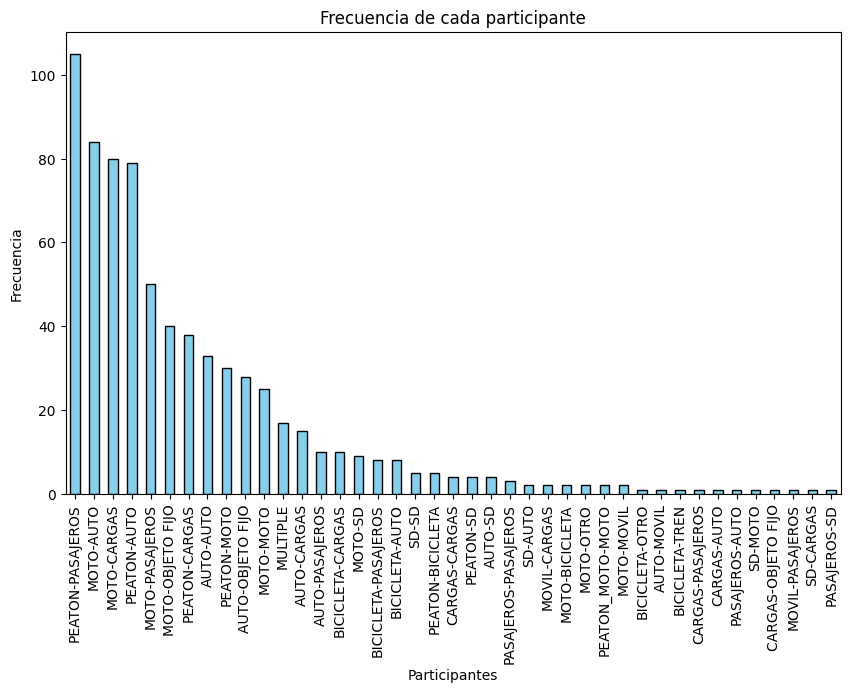

In [85]:
# Calcular la frecuencia de cada participante
frecuencia_participantes = Homicidios['PARTICIPANTES'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_participantes.plot(kind='bar', color='skyblue', edgecolor='black')

# Agregar títulos y etiquetas
plt.title('Frecuencia de cada participante')
plt.xlabel('Participantes')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [86]:
# Display unique values of 'EDAD' column
unique_values = Homicidios['EDAD'].nunique()
print(unique_values)

86


In [87]:
from scipy.stats import chi2_contingency

# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(Homicidios['SEXO'], Homicidios['ACUSADO'])

# Imprimir la tabla de contingencia
print('Tabla de contingencia:')
print(tabla_contingencia)
print()

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Imprimir los resultados de la prueba
print('Resultado de la prueba de chi-cuadrado:')
print('Valor de chi-cuadrado:', chi2)
print('Valor p:', p)

Tabla de contingencia:
ACUSADO    AUTO  BICICLETA  CARGAS  MOTO  MULTIPLE  OBJETO FIJO  OTRO  \
SEXO                                                                    
FEMENINO     46          4      36    15         6            8     2   
MASCULINO   164          3     113    42        11           59     4   
SD            0          0       1     1         0            0     0   

ACUSADO    PASAJEROS  SD  TREN  
SEXO                            
FEMENINO          47   2     0  
MASCULINO        131  17     1  
SD                 0   4     0  

Resultado de la prueba de chi-cuadrado:
Valor de chi-cuadrado: 95.06240255327924
Valor p: 1.7608206017934387e-12


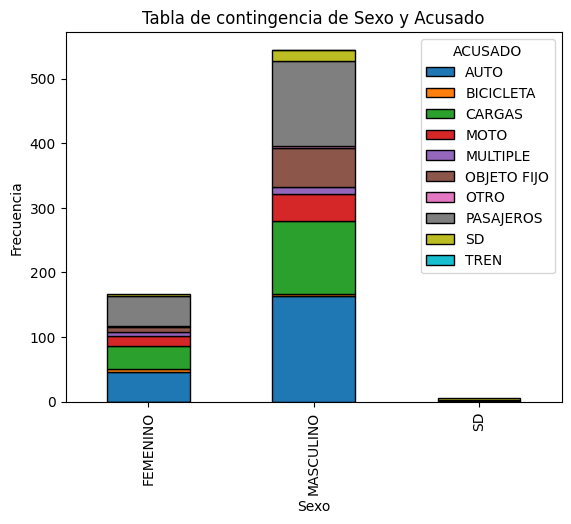

In [88]:
import matplotlib.pyplot as plt

# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(Homicidios['SEXO'], Homicidios['ACUSADO'])

# Crear el gráfico de barras apiladas
tabla_contingencia.plot(kind='bar', stacked=True, edgecolor='black')

# Agregar títulos y etiquetas
plt.title('Tabla de contingencia de Sexo y Acusado')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

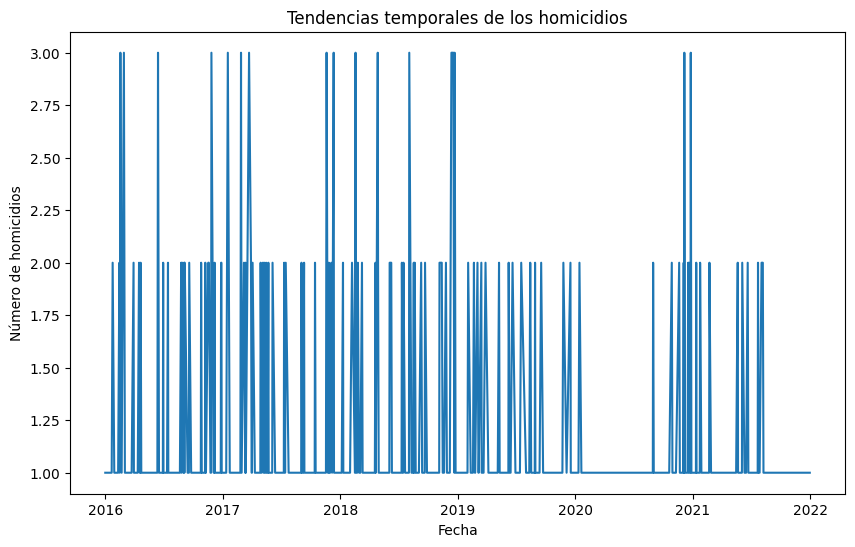

In [89]:
import matplotlib.pyplot as plt


# Convertir la columna de fecha a datetime
Homicidios['FECHA'] = pd.to_datetime(Homicidios['FECHA'])

# Agrupar por fecha y contar el número de homicidios
homicidios_por_fecha = Homicidios.groupby('FECHA').size()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(homicidios_por_fecha.index, homicidios_por_fecha.values)

# Agregar títulos y etiquetas
plt.title('Tendencias temporales de los homicidios')
plt.xlabel('Fecha')
plt.ylabel('Número de homicidios')

# Mostrar el gráfico
plt.show()

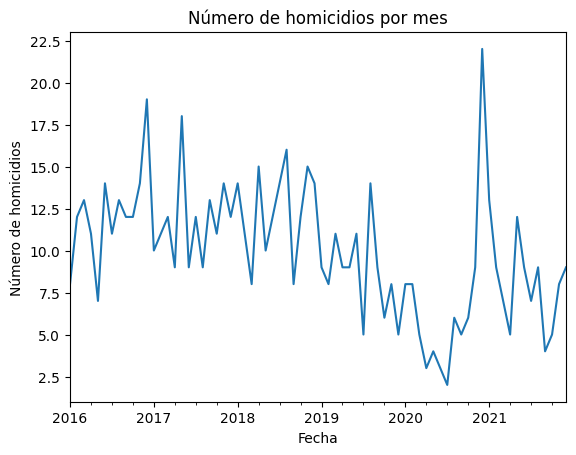

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Renombrar las columnas 'AAAA', 'MM' y 'DD' a 'year', 'month' y 'day'
Homicidios = Homicidios.rename(columns={'AAAA': 'year', 'MM': 'month', 'DD': 'day'})

# Combinar las columnas 'year', 'month' y 'day' para crear una columna de fecha
Homicidios['FECHA'] = pd.to_datetime(Homicidios[['year', 'month', 'day']])

# Establecer la columna 'FECHA' como el índice
Homicidios.set_index('FECHA', inplace=True)

# Resample los datos por mes y cuenta el número de homicidios
homicidios_mes = Homicidios.resample('M').size()

# Crear un gráfico de la serie temporal
homicidios_mes.plot()

# Agregar títulos y etiquetas
plt.title('Número de homicidios por mes')
plt.xlabel('Fecha')
plt.ylabel('Número de homicidios')

# Mostrar el gráfico
plt.show()

In [135]:
import pandas as pd
from datetime import datetime

# Convertimos la columna de fecha a datetime
Homicidios['FECHA'] = pd.to_datetime(Homicidios['FECHA'])

# Filtramos los datos del último año
ultimo_año = Homicidios[Homicidios['FECHA'] >= datetime.now() - pd.DateOffset(years=1)]

# Calculamos la tasa de homicidios del último semestre
ultimo_semestre = ultimo_año[ultimo_año['FECHA'] >= datetime.now() - pd.DateOffset(months=6)]
tasa_ultimo_semestre = len(ultimo_semestre) / 100000

# Calculamos la tasa de homicidios del semestre anterior
semestre_anterior = ultimo_año[ultimo_año['FECHA'] < datetime.now() - pd.DateOffset(months=6)]
tasa_semestre_anterior = len(semestre_anterior) / 100000

# Calculamos la reducción en porcentaje
if tasa_semestre_anterior != 0:
    reduccion = (tasa_semestre_anterior - tasa_ultimo_semestre) / tasa_semestre_anterior * 100
else:
    reduccion = 0

print(f"La reducción en la tasa de homicidios fue del {reduccion}%")


La reducción en la tasa de homicidios fue del 0%


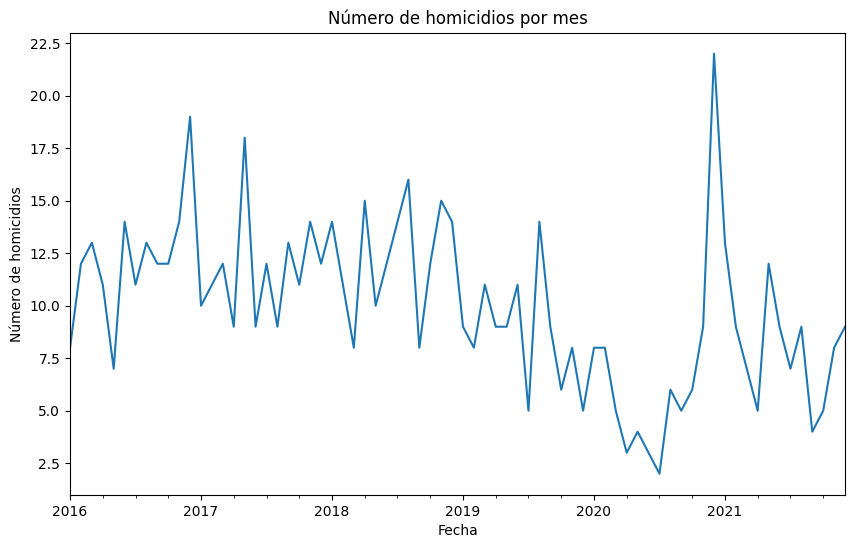

In [139]:
# Creamos el gráfico
plt.figure(figsize=(10,6))
homicidios_mes.plot(kind='line')

# Agregamos títulos y etiquetas
plt.title('Número de homicidios por mes')
plt.xlabel('Fecha')
plt.ylabel('Número de homicidios')

# Mostramos el gráfico
plt.show()

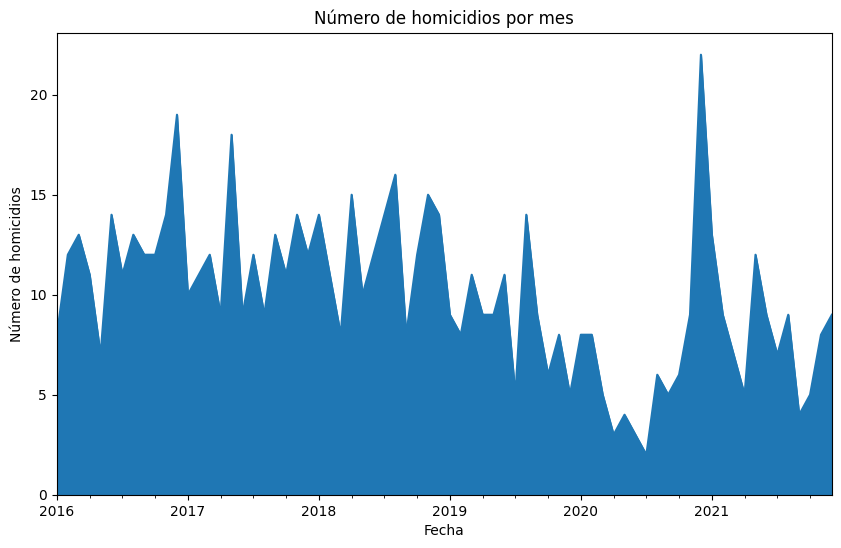

In [140]:
# Creamos el gráfico
plt.figure(figsize=(10,6))
homicidios_mes.plot(kind='area')

# Agregamos títulos y etiquetas
plt.title('Número de homicidios por mes')
plt.xlabel('Fecha')
plt.ylabel('Número de homicidios')

# Mostramos el gráfico
plt.show()

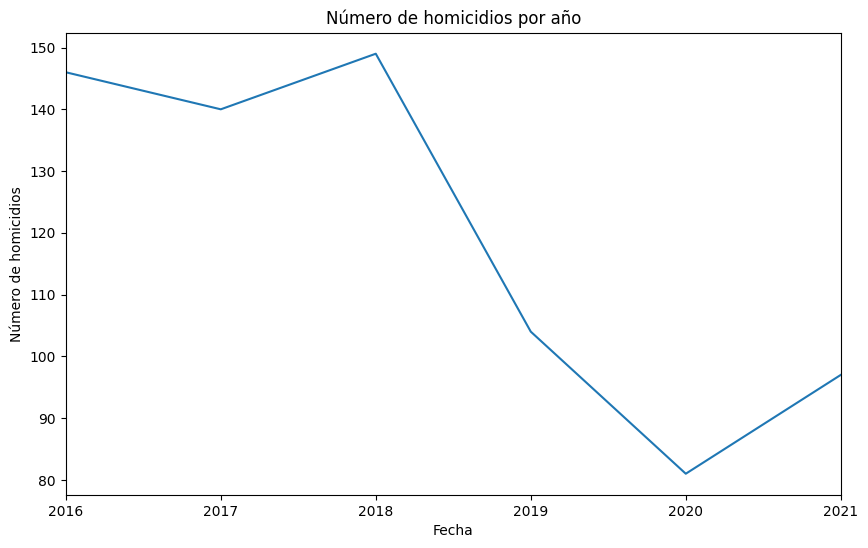

In [141]:
# Agrupamos los datos por año y contamos el número de homicidios
homicidios_año = Homicidios.resample('A').size()

# Creamos el gráfico
plt.figure(figsize=(10,6))
homicidios_año.plot(kind='line')

# Agregamos títulos y etiquetas
plt.title('Número de homicidios por año')
plt.xlabel('Fecha')
plt.ylabel('Número de homicidios')

# Mostramos el gráfico
plt.show()

In [142]:
Homicidios.columns

Index(['ID', 'N_VICTIMAS', 'AAAA', 'MM', 'DD', 'HORA', 'HH', 'LUGAR_DEL_HECHO',
       'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce', 'Dirección Normalizada',
       'COMUNA', 'XY (CABA)', 'pos x', 'pos y', 'PARTICIPANTES', 'ACUSADO',
       'ROL', 'VICTIMA', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [144]:
Homicidios.isnull().sum()

ID                         0
N_VICTIMAS                 0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   584
Cruce                    177
Dirección Normalizada      9
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
ACUSADO                    0
ROL                        0
VICTIMA                    0
SEXO                       0
EDAD                       0
FECHA_FALLECIMIENTO        0
dtype: int64

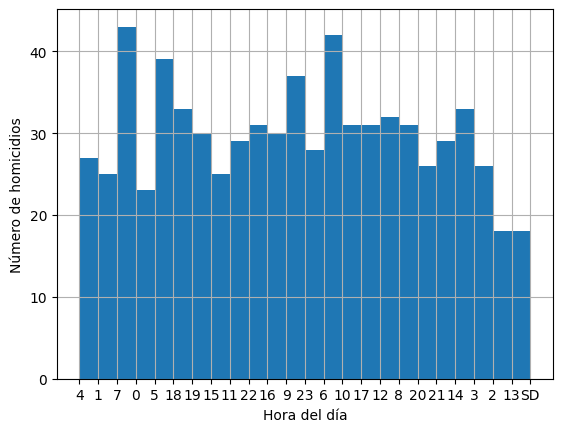

In [145]:
import matplotlib.pyplot as plt

Homicidios['HH'].hist(bins=24)
plt.xlabel('Hora del día')
plt.ylabel('Número de homicidios')
plt.show()

In [146]:
Homicidios['TIPO_DE_CALLE'].value_counts()

TIPO_DE_CALLE
AVENIDA      442
CALLE        138
GRAL PAZ      69
AUTOPISTA     68
Name: count, dtype: int64

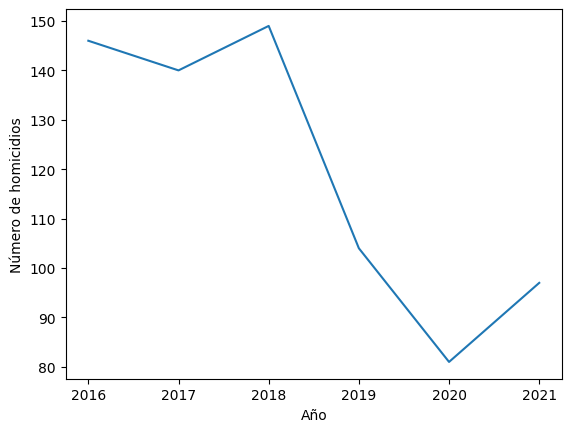

In [147]:
Homicidios.groupby('AAAA')['ID'].count().plot()
plt.xlabel('Año')
plt.ylabel('Número de homicidios')
plt.show()

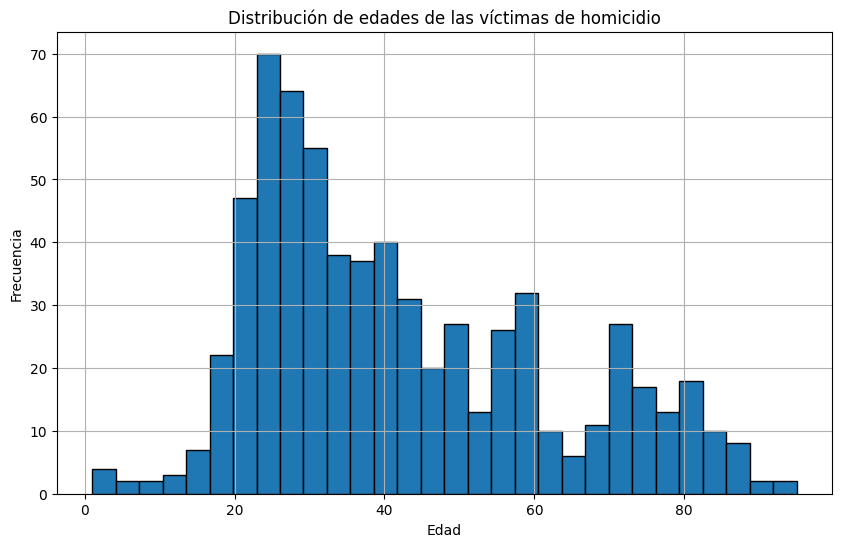

In [148]:
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'EDAD' sea numérica
Homicidios['EDAD'] = pd.to_numeric(Homicidios['EDAD'], errors='coerce')

# Crea el histograma
plt.figure(figsize=(10,6))
Homicidios['EDAD'].hist(bins=30, edgecolor='black')

# Agrega títulos y etiquetas
plt.title('Distribución de edades de las víctimas de homicidio')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

In [149]:
import pandas as pd

# Asegúrate de que la columna 'EDAD' sea numérica
Homicidios['EDAD'] = pd.to_numeric(Homicidios['EDAD'], errors='coerce')

# Calcula el IQR
Q1 = Homicidios['EDAD'].quantile(0.25)
Q3 = Homicidios['EDAD'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica los outliers
outliers = Homicidios[(Homicidios['EDAD'] < lower_bound) | (Homicidios['EDAD'] > upper_bound)]

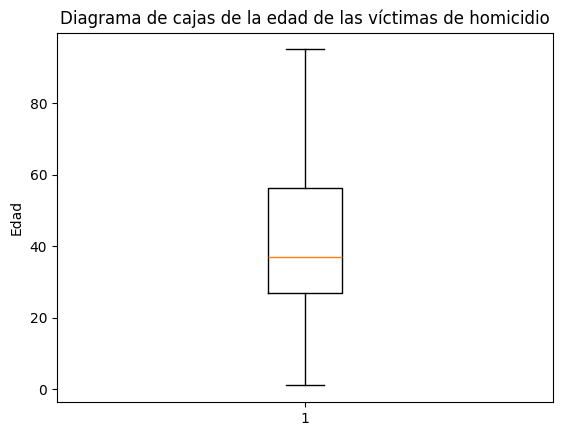

In [11]:
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'EDAD' sea numérica
Homicidios['EDAD'] = pd.to_numeric(Homicidios['EDAD'], errors='coerce')

# Crea el diagrama de cajas
plt.boxplot(Homicidios['EDAD'].dropna())
plt.title('Diagrama de cajas de la edad de las víctimas de homicidio')
plt.ylabel('Edad')
plt.show()

### Cambiar los valores **SD** por **NaN**

In [10]:
import matplotlib.pyplot as plt

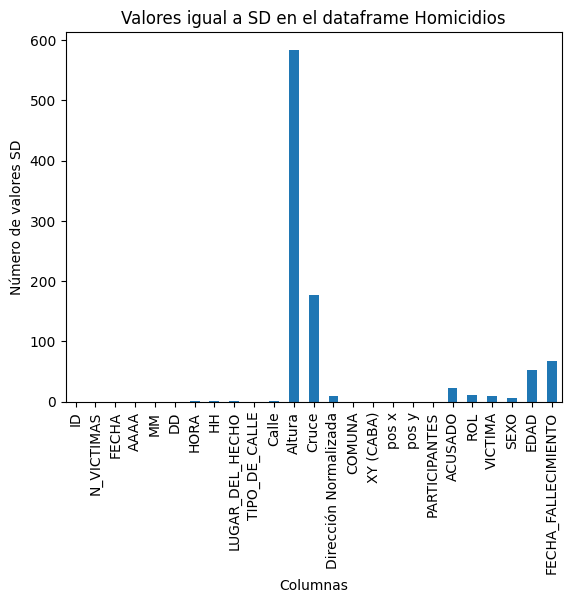

In [13]:
# mostrar los valores igual a SD en el dataframe en un gráfico de barras
Homicidios.isin(['SD']).sum().plot(kind='bar')
plt.title('Valores igual a SD en el dataframe Homicidios')
plt.xlabel('Columnas')
plt.ylabel('Número de valores SD')
plt.show()

In [57]:
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,NaN
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01


In [58]:
# valores NaN en el dataframe victimas
victimas.isnull().sum()

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                     0
VICTIMA                 0
SEXO                    0
EDAD                    0
FECHA_FALLECIMIENTO    68
dtype: int64

In [25]:
Homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,18,0
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,PASAJEROS,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [ ]:
import pandas as pd
# Leer el archivo xlsx
xlsx_file = pd.ExcelFile('homicidios.xlsx')

# Leer la página "Victimas" del archivo xlsx
df = pd.read_excel(xlsx_file, sheet_name='Victimas')

# Guardar el dataframe en un archivo csv
df.to_csv('Victimas.csv', index=False)


### Cambiamos el tipo de datos de cada columna que usaremos para los analisis
Estas conversiones son necesarias para poder realizar operaciones y análisis adecuados en estas columnas. 

In [29]:
# mostrar los valores faltantes en el dataframe
Homicidios.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       1
HH                         1
LUGAR_DEL_HECHO            1
TIPO_DE_CALLE              0
Calle                      1
Altura                   584
Cruce                    177
Dirección Normalizada      9
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
ACUSADO                   23
ROL                       11
VICTIMA                    9
SEXO                       6
EDAD                      53
FECHA_FALLECIMIENTO       68
dtype: int64

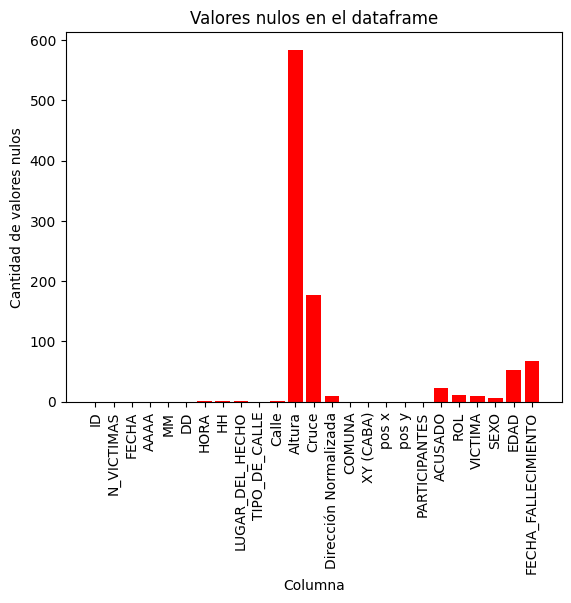

In [33]:
import matplotlib.pyplot as plt

# Contar los valores nulos en cada columna
null_counts = Homicidios.isnull().sum()

# Crear el gráfico de barras con color rojo
plt.bar(null_counts.index, null_counts.values, color='red')

# Agregar títulos y etiquetas
plt.title('Valores nulos en el dataframe')
plt.xlabel('Columna')
plt.ylabel('Cantidad de valores nulos')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

### **Decisiones tomadas para el tratamiento de los valores NaN - Reporte**
- Para los valores faltantes de la columna Altura que tiene 584 valores NaN se decidio eliminar los valores y quedarnos con los 133 valores unicos.
- Para la columna Cruce Igual se eliminaran los valores NaN 177 valores en total
- Para la columna Dirección Normalizada tenemos 9 valores NaN en total se eliminaran
- Para la columna Acusado para fines practicos y teniendo en cuenta que se puede producir un sesgo en el analisis, pero con fines de practica y conservar los datos se decidio imputar por la moda
- Para la columna Edad también se imputaran valores
- Para la columna Rol igual
- Para la columna Victima igual
- Para la Victima Sexo igual
- Hora igual 


In [70]:
Homicidios.count()

ID                       717
N_VICTIMAS               717
FECHA                    717
AAAA                     717
MM                       717
DD                       717
HORA                     717
HH                       717
LUGAR_DEL_HECHO          717
TIPO_DE_CALLE            717
Calle                    716
Altura                   133
Cruce                    540
Dirección Normalizada    708
COMUNA                   717
XY (CABA)                717
pos x                    717
pos y                    717
PARTICIPANTES            717
ACUSADO                  717
ROL                      717
VICTIMA                  717
SEXO                     717
EDAD                     717
FECHA_FALLECIMIENTO      649
dtype: int64

In [68]:
Homicidios.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   584
Cruce                    177
Dirección Normalizada      9
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
ACUSADO                    0
ROL                        0
VICTIMA                    0
SEXO                       0
EDAD                       0
FECHA_FALLECIMIENTO       68
dtype: int64

### Reporte de la imputación de **FECHA_FALLECIMIENTO** 
- Antes de la imputación se tenía ``68`` valores **NaN** se decidio imputar los valores faltantes por los valores de la columna **FECHA** para evitar perdidas de datos. Aun así se observo que puede tener un sesgo porque muchos de los fallecidos no murieron en la fecha que fue reportado el siniestro víal observamos casos de los que fallecieron en la misma fecha y otros unos días después. 

In [22]:
# Crea una condición booleana que sea True para las filas donde 'FECHA_FALLECIMIENTO' es posterior a 'FECHA'
condicion = Homicidios['FECHA_FALLECIMIENTO'] > Homicidios['FECHA']

# Usa la condición para filtrar el DataFrame y selecciona solo las columnas 'FECHA' y 'FECHA_FALLECIMIENTO'
Homicidios_posteriores = Homicidios.loc[condicion, ['FECHA', 'FECHA_FALLECIMIENTO']]

# Muestra el DataFrame resultante
Homicidios_posteriores

,FECHA,FECHA_FALLECIMIENTO
4,2016-01-21,2016-02-01
6,2016-01-24,2016-01-26
12,2016-02-15,2016-02-16
14,2016-02-17,2016-03-02
18,2016-02-28,2016-03-04
...,...,...
709,2021-12-10,2022-01-03
712,2021-12-13,2021-12-18
714,2021-12-30,2022-01-02
715,2021-12-15,2021-12-20


### Convertir la columna **``FECHA``** a tipo **datetime**

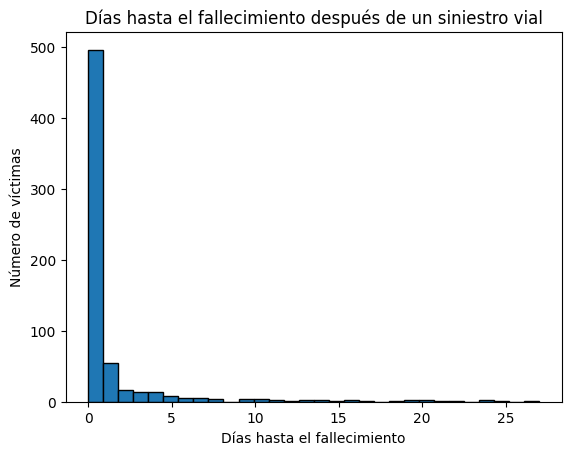

In [23]:
import matplotlib.pyplot as plt

# Asegúrate de que las columnas 'FECHA' y 'FECHA_FALLECIMIENTO' son de tipo datetime
Homicidios['FECHA'] = pd.to_datetime(Homicidios['FECHA'])
Homicidios['FECHA_FALLECIMIENTO'] = pd.to_datetime(Homicidios['FECHA_FALLECIMIENTO'], errors='coerce')

# Crea una nueva columna que represente la diferencia en días entre 'FECHA_FALLECIMIENTO' y 'FECHA'
Homicidios['DIAS_HASTA_FALLECIMIENTO'] = (Homicidios['FECHA_FALLECIMIENTO'] - Homicidios['FECHA']).dt.days

# Crea un histograma de la columna 'DIAS_HASTA_FALLECIMIENTO'
plt.hist(Homicidios['DIAS_HASTA_FALLECIMIENTO'].dropna(), bins=30, edgecolor='black')
plt.title('Días hasta el fallecimiento después de un siniestro vial')
plt.xlabel('Días hasta el fallecimiento')
plt.ylabel('Número de víctimas')
plt.show()

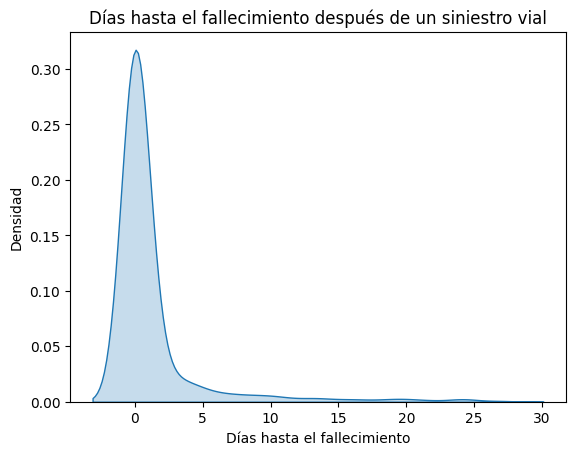

In [24]:
import seaborn as sns

# Crea un gráfico de densidad de kernel de la columna 'DIAS_HASTA_FALLECIMIENTO'
sns.kdeplot(Homicidios['DIAS_HASTA_FALLECIMIENTO'].dropna(), fill=True)
plt.title('Días hasta el fallecimiento después de un siniestro vial')
plt.xlabel('Días hasta el fallecimiento')
plt.ylabel('Densidad')
plt.show()

In [85]:
# Cuenta la cantidad de veces que cada valor aparece en la columna 'DIAS_HASTA_FALLECIMIENTO'
conteo_dias = Homicidios['DIAS_HASTA_FALLECIMIENTO'].value_counts().sort_index()

# Convierte el conteo de días a un DataFrame para mostrarlo como una tabla
tabla_dias = conteo_dias.reset_index()
tabla_dias.columns = ['Días hasta el fallecimiento', 'Número de víctimas']

# Muestra la tabla
tabla_dias

,Días hasta el fallecimiento,Número de víctimas
0,0.0,496
1,1.0,55
2,2.0,17
3,3.0,13
4,4.0,13
5,5.0,8
6,6.0,5
7,7.0,5
8,8.0,4
9,9.0,4


c:\Users\57301\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


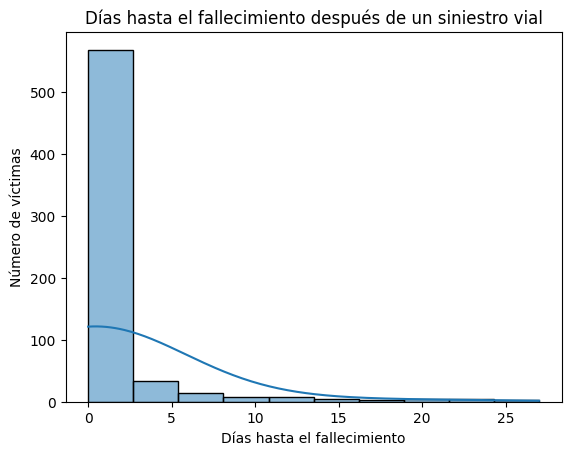

In [89]:
import seaborn as sns

# Crea un histograma con una línea de densidad de kernel de la columna 'Días hasta el fallecimiento'
sns.histplot(tabla_dias, x='Días hasta el fallecimiento', weights='Número de víctimas', kde=True)
plt.title('Días hasta el fallecimiento después de un siniestro vial')
plt.xlabel('Días hasta el fallecimiento')
plt.ylabel('Número de víctimas')
plt.show()

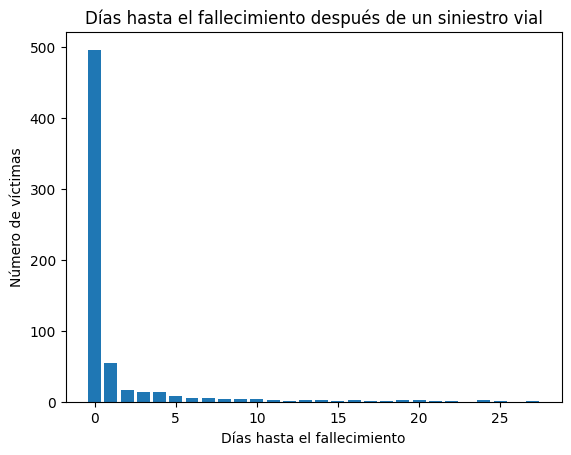

In [86]:
import matplotlib.pyplot as plt

# Crea un gráfico de barras de la columna 'Días hasta el fallecimiento'
plt.bar(tabla_dias['Días hasta el fallecimiento'], tabla_dias['Número de víctimas'])
plt.title('Días hasta el fallecimiento después de un siniestro vial')
plt.xlabel('Días hasta el fallecimiento')
plt.ylabel('Número de víctimas')
plt.show()

In [72]:
# mostrar valores nulos de la columna 'FECHA_FALLECIMIENTO'
Homicidios[Homicidios['FECHA_FALLECIMIENTO'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,18,NaN
16,2016-0022,1,2016-02-21,2016,2,21,06:00:00,6,AV 9 DE JULIO Y ADOLFO ALSINA,AVENIDA,...,Point (107507.39502374 102046.08333077),-58.38144696,-34.61079875,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,41,NaN
19,2016-0027,1,2016-02-28,2016,2,28,09:35:00,9,CURAPALIGUE Y AVELINO DIAZ,AVENIDA,...,Point (101679.82794245 98973.02976850),-58.44497874,-34.63852623,AUTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,34,NaN
22,2016-0031,1,2016-03-08,2016,3,8,12:30:00,12,AV GRAL PAZ Y AV CNEL ROCA,GRAL PAZ,...,Point (99327.01838497 92326.91130631),-58.47064556,-34.69843756,MOTO-PASAJEROS,PASAJEROS,CONDUCTOR,MOTO,MASCULINO,21,NaN
33,2016-0045,1,2016-04-11,2016,4,11,10:25:00,10,AV GRAL PAZ Y AV DEL LIBERTADOR,GRAL PAZ,...,Point (99620.34936816 110483.29286598),-58.46743471,-34.53476874,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,SD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2017-0089,1,2017-07-13,2017,7,13,12:05:00,12,MARTINIANO LEGUIZAMON 901,CALLE,...,Point (95246.78684010 97935.32361317),-58.51514709,-34.64787051,SD-AUTO,AUTO,SD,SD,MASCULINO,23,NaN
242,2017-0112,2,2017-09-10,2017,9,10,09:32:17,9,AU 25 DE MAYO Y AV. VARELA,AUTOPISTA,...,Point (100479.14412395 98812.52258620),-58.45807401,-34.63997430,AUTO-OBJETO FIJO,OBJETO FIJO,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,1,NaN
246,2017-0115,1,2017-09-19,2017,9,19,18:52:33,18,AV. PAVON Y TREINTA Y TRES ORIENTALES,AVENIDA,...,Point (103803.42869640 99818.79654291),-58.42182126,-34.63089661,MOTO-BICICLETA,BICICLETA,CONDUCTOR,MOTO,MASCULINO,34,NaN
253,2017-0126,2,2017-10-14,2017,10,14,06:15:00,6,AV. RIESTRA Y CAÑADA DE GOMEZ,AVENIDA,...,Point (98466.20276785 94207.42419155),-58.48003734,-34.68148508,AUTO-OBJETO FIJO,OBJETO FIJO,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,39,NaN


### Segundo paso Imputar los valores de la columna **FECHA_FALLECIMIENTO** por **FECHA**


In [91]:
# Asegúrate de que ambas columnas son de tipo datetime
Homicidios['FECHA'] = pd.to_datetime(Homicidios['FECHA'])
Homicidios['FECHA_FALLECIMIENTO'] = pd.to_datetime(Homicidios['FECHA_FALLECIMIENTO'], errors='coerce')

# Crea una copia de la columna 'FECHA_FALLECIMIENTO'
Homicidios['FECHA_FALLECIMIENTO_IMPUTADA'] = Homicidios['FECHA_FALLECIMIENTO'].copy()

# Reemplaza los valores NaT en la columna 'FECHA_FALLECIMIENTO_IMPUTADA' con los valores correspondientes de la columna 'FECHA'
Homicidios['FECHA_FALLECIMIENTO_IMPUTADA'].fillna(Homicidios['FECHA'], inplace=True)

In [94]:
Homicidios.head(4)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIAS_HASTA_FALLECIMIENTO,FECHA_FALLECIMIENTO_IMPUTADA
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-34.68757022,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,0.0,2016-01-01
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,-34.66977709,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,0.0,2016-01-02
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-34.63189362,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,0.0,2016-01-03
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-34.68092974,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,18,NaT,NaN,2016-01-10


In [95]:
# Eliminar la columna 'FECHA_FALLECIMIENTO' y renombrar la columna 'FECHA_FALLECIMIENTO_IMPUTADA' a 'FECHA_FALLECIMIENTO'
Homicidios.drop('FECHA_FALLECIMIENTO', axis=1, inplace=True)
Homicidios.rename(columns={'FECHA_FALLECIMIENTO_IMPUTADA':'FECHA_FALLECIMIENTO'}, inplace=True)

In [96]:
Homicidios.head(4) # Ahora tenemos 0 valores nulos en la columna 'FECHA_FALLECIMIENTO'

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,DIAS_HASTA_FALLECIMIENTO,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.47533969,-34.68757022,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19,0.0,2016-01-01
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,-58.50877521,-34.66977709,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70,0.0,2016-01-02
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.39040293,-34.63189362,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30,0.0,2016-01-03
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.46503904,-34.68092974,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,18,NaN,2016-01-10


### ***Hacer de nuevo el analisis de los días después del fallecimiento actualizar los gráficos*** 

Eliminamos el valor de la fila ID: **``2016-0151``** que es el único valor nulo de la columna Calle y después de analizar las filas notamos que tiene muchos valores nulos

In [99]:
# mostrar el valor nulo de la columna Calle
Homicidios[Homicidios['Calle'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,DIAS_HASTA_FALLECIMIENTO,FECHA_FALLECIMIENTO
121,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,.,.,PEATON-SD,SD,PEATON,PEATON,SD,SD,NaN,2016-11-18


In [100]:
# Eliminar las filas con valores nulos en la columna 'Calle'
Homicidios.dropna(subset=['Calle'], inplace=True)

In [101]:
# mostrar el valor nulo de la columna Calle
Homicidios[Homicidios['Calle'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,DIAS_HASTA_FALLECIMIENTO,FECHA_FALLECIMIENTO


In [105]:
Homicidios.isnull().sum()

ID                            0
N_VICTIMAS                    0
FECHA                         0
AAAA                          0
MM                            0
DD                            0
HORA                          0
HH                            0
LUGAR_DEL_HECHO               0
TIPO_DE_CALLE                 0
Calle                         0
Altura                      583
Cruce                       176
Dirección Normalizada         8
COMUNA                        0
XY (CABA)                     0
pos x                         0
pos y                         0
PARTICIPANTES                 0
ACUSADO                       0
ROL                           0
VICTIMA                       0
SEXO                          0
EDAD                          0
DIAS_HASTA_FALLECIMIENTO     67
FECHA_FALLECIMIENTO           0
dtype: int64

In [118]:
# Reemplaza los valores NaN en la columna 'Altura' con el valor de 'Altura' de la fila anterior cuando la columna 'Calle' sea la misma
Homicidios['Altura'] = Homicidios.groupby('Calle')['Altura'].fillna(method='ffill')

In [125]:
# Reemplaza los valores NaN en la columna Cruce con el valor de Cruce de la fila anterior cuando la columna 'Calle' sea la misma
Homicidios['Cruce'] = Homicidios.groupby('Calle')['Cruce'].fillna(method='ffill')

In [126]:
# mostrar solo la columna 'Calle' y 'cruce' de las filas que contienen el valor LUGONES, LEOPOLDO AV.
Homicidios[Homicidios['Calle'] == 'DEL LIBERTADOR AV.'][['Calle', 'Cruce']]

,Calle,Cruce
57,DEL LIBERTADOR AV.,"UDAONDO, GUILLERMO AV."
91,DEL LIBERTADOR AV.,TAGLE
113,DEL LIBERTADOR AV.,"RAMOS MEJIA, JOSE MARIA, DR. AV."
116,DEL LIBERTADOR AV.,LA PAMPA
216,DEL LIBERTADOR AV.,RODRIGUEZ PE?A
236,DEL LIBERTADOR AV.,JARAMILLO
289,DEL LIBERTADOR AV.,MANZANARES
302,DEL LIBERTADOR AV.,"RAMOS MEJIA, JOSE MARIA, DR. AV."
363,DEL LIBERTADOR AV.,ORTIZ DE OCAMPO
444,DEL LIBERTADOR AV.,ORTIZ DE OCAMPO


In [123]:
Homicidios.count()

ID                          716
N_VICTIMAS                  716
FECHA                       716
AAAA                        716
MM                          716
DD                          716
HORA                        716
HH                          716
LUGAR_DEL_HECHO             716
TIPO_DE_CALLE               716
Calle                       716
Altura                      269
Cruce                       540
Dirección Normalizada       716
COMUNA                      716
XY (CABA)                   716
pos x                       716
pos y                       716
PARTICIPANTES               716
ACUSADO                     716
ROL                         716
VICTIMA                     716
SEXO                        716
EDAD                        716
DIAS_HASTA_FALLECIMIENTO    649
FECHA_FALLECIMIENTO         716
dtype: int64

In [119]:
Homicidios.isnull().sum()

ID                            0
N_VICTIMAS                    0
FECHA                         0
AAAA                          0
MM                            0
DD                            0
HORA                          0
HH                            0
LUGAR_DEL_HECHO               0
TIPO_DE_CALLE                 0
Calle                         0
Altura                      447
Cruce                       176
Dirección Normalizada         0
COMUNA                        0
XY (CABA)                     0
pos x                         0
pos y                         0
PARTICIPANTES                 0
ACUSADO                       0
ROL                           0
VICTIMA                       0
SEXO                          0
EDAD                          0
DIAS_HASTA_FALLECIMIENTO     67
FECHA_FALLECIMIENTO           0
dtype: int64

In [127]:
Homicidios.isnull().sum()

ID                            0
N_VICTIMAS                    0
FECHA                         0
AAAA                          0
MM                            0
DD                            0
HORA                          0
HH                            0
LUGAR_DEL_HECHO               0
TIPO_DE_CALLE                 0
Calle                         0
Altura                      447
Cruce                        70
Dirección Normalizada         0
COMUNA                        0
XY (CABA)                     0
pos x                         0
pos y                         0
PARTICIPANTES                 0
ACUSADO                       0
ROL                           0
VICTIMA                       0
SEXO                          0
EDAD                          0
DIAS_HASTA_FALLECIMIENTO     67
FECHA_FALLECIMIENTO           0
dtype: int64

In [129]:
# mostrar los valores nulos de la columna Calle y Cruce
Homicidios[Homicidios['Calle'].isnull() | Homicidios['Cruce'].isnull()] 

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,DIAS_HASTA_FALLECIMIENTO,FECHA_FALLECIMIENTO
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.39040293,-34.63189362,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30,0.0,2016-01-03
9,2016-0013,1,2016-02-10,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,...,-58.39114932,-34.62477387,PEATON-AUTO,AUTO,PEATON,PEATON,MASCULINO,16,0.0,2016-02-10
14,2016-0020,1,2016-02-17,2016,2,17,16:00:00,16,SUIPACHA 156,CALLE,...,-58.37952223,-34.60653282,PEATON-AUTO,AUTO,PEATON,PEATON,MASCULINO,59,14.0,2016-03-02
34,2016-0047,1,2016-04-15,2016,4,15,05:30:00,5,LIMA 1483,CALLE,...,-58.38247061,-34.62571878,PEATON-PASAJEROS,PASAJEROS,PEATON,PEATON,MASCULINO,41,0.0,2016-04-15
36,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,-58.37714647568196,-34.63657525428238,SD-SD,SD,SD,SD,SD,SD,NaN,2016-04-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,.,.,MOTO-CARGAS,CARGAS,CONDUCTOR,MOTO,MASCULINO,24,0.0,2021-03-01
649,2021-0030,1,2021-04-03,2021,4,3,18:30:00,18,FINOCHIETTO ENRIQUE DR. 1623,CALLE,...,-58.38685612,-34.63455776,PEATON-PASAJEROS,PASAJEROS,PEATON,PEATON,MASCULINO,36,4.0,2021-04-07
687,2021-0068,1,2021-08-15,2021,8,15,06:10:00,6,"BEIRO, FRANCISCO AV. 5071",AVENIDA,...,-58.52161176,-34.61164474,MOTO-OBJETO FIJO,OBJETO FIJO,CONDUCTOR,MOTO,MASCULINO,39,0.0,2021-08-15
706,2021-0087,1,2021-11-27,2021,11,27,11:22:00,11,ESMERALDA 1359,CALLE,...,-58.37795815,-34.59167894,PEATON-BICICLETA,BICICLETA,PEATON,PEATON,FEMENINO,73,0.0,2021-11-27


In [134]:
# mostrar solo la columna 'Calle' y 'cruce' de las filas que contienen valores nulos en Cruce
Homicidios[Homicidios['Cruce'].isnull()][['Calle', 'Cruce']]

,Calle,Cruce
2,ENTRE RIOS AV.,NaN
9,ENTRE RIOS AV.,NaN
14,SUIPACHA,NaN
34,LIMA,NaN
36,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN
...,...,...
642,AUTOPISTA BUENOS AIRES - LA PLATA,NaN
649,FINOCHIETTO ENRIQUE DR.,NaN
687,"BEIRO, FRANCISCO AV.",NaN
706,ESMERALDA,NaN


In [138]:
# Reemplaza los valores NaN en la columna 'Cruce' con los valores correspondientes de la columna 'Calle'
Homicidios['Cruce'].fillna(Homicidios['Calle'], inplace=True)

In [139]:
Homicidios.isnull().sum()

ID                            0
N_VICTIMAS                    0
FECHA                         0
AAAA                          0
MM                            0
DD                            0
HORA                          0
HH                            0
LUGAR_DEL_HECHO               0
TIPO_DE_CALLE                 0
Calle                         0
Altura                      447
Cruce                         0
Dirección Normalizada         0
COMUNA                        0
XY (CABA)                     0
pos x                         0
pos y                         0
PARTICIPANTES                 0
ACUSADO                       0
ROL                           0
VICTIMA                       0
SEXO                          0
EDAD                          0
DIAS_HASTA_FALLECIMIENTO     67
FECHA_FALLECIMIENTO           0
dtype: int64

### Eliminamos la columna **Altura**
- Probar después el siguiente código:

In [ ]:
# from geopy.geocoders import Nominatim
# import numpy as np

# # Inicializa el geocodificador
# geolocator = Nominatim(user_agent="myGeocoder")

# # Itera sobre las filas del DataFrame
# for i, row in Homicidios.iterrows():
#     # Solo realiza la geocodificación inversa si el valor de 'Altura' es NaN
#     if pd.isna(row['Altura']):
#         # Obtiene las coordenadas de la columna 'XY(CABA)'
#         coords = row['XY(CABA)']
        
#         # Comprueba que coords no es NaN
#         if pd.notna(coords):
#             # Obtiene la dirección correspondiente a las coordenadas
#             location = geolocator.reverse(coords, exactly_one=True)
            
#             # Comprueba que location no es None
#             if location is not None:
#                 # Extrae el número de la calle de la dirección (si está disponible)
#                 if 'house_number' in location.raw['address']:
#                     house_number = location.raw['address']['house_number']
                    
#                     # Reemplaza el valor NaN en la columna 'Altura' con el número de la calle
#                     Homicidios.loc[i, 'Altura'] = house_number

In [145]:
# Elimanar la columna 'Altura'
Homicidios.drop('Altura', axis=1, inplace=True)

In [147]:
Homicidios.isnull().sum()

ID                           0
N_VICTIMAS                   0
FECHA                        0
AAAA                         0
MM                           0
DD                           0
HORA                         0
HH                           0
LUGAR_DEL_HECHO              0
TIPO_DE_CALLE                0
Calle                        0
Cruce                        0
Dirección Normalizada        0
COMUNA                       0
XY (CABA)                    0
pos x                        0
pos y                        0
PARTICIPANTES                0
ACUSADO                      0
ROL                          0
VICTIMA                      0
SEXO                         0
EDAD                         0
DIAS_HASTA_FALLECIMIENTO    67
FECHA_FALLECIMIENTO          0
dtype: int64

### Segundo tratamiento de los valores **``NaN``**

In [151]:
# Cuenta el número de veces que aparece 'SD' en cada columna
conteo_sd = Homicidios.apply(lambda x: x.value_counts().get('SD', 0))

# Muestra el conteo
print(conteo_sd)

ID                           0
N_VICTIMAS                   0
FECHA                        0
AAAA                         0
MM                           0
DD                           0
HORA                         1
HH                           1
LUGAR_DEL_HECHO              0
TIPO_DE_CALLE                0
Calle                        0
Cruce                        0
Dirección Normalizada        0
COMUNA                       0
XY (CABA)                    0
pos x                        0
pos y                        0
PARTICIPANTES                0
ACUSADO                     22
ROL                         11
VICTIMA                      9
SEXO                         5
EDAD                         0
DIAS_HASTA_FALLECIMIENTO     0
FECHA_FALLECIMIENTO          0
dtype: int64


### Tratamiento de los valores **SD** o **NaN** de la columna **EDAD**
Para fines practicos y recuperar datos hizomos una imputación con la mediana que es 35 a los valores faltantes 

In [149]:
import numpy as np

In [150]:
# Convertir los valores 'SD' a NaN en la columna EDAD
Homicidios['EDAD'] = Homicidios['EDAD'].replace('SD', np.nan)

In [155]:
# Convertir los valores NaN a 0 en la columna EDAD
Homicidios['EDAD'] = Homicidios['EDAD'].fillna(0)
# cambiar el tipo de datos de la columna EDAD a int
Homicidios['EDAD'] = Homicidios['EDAD'].astype(int)

In [157]:
# calcular la mediana de la columna EDAD y reemplazar los valores 0 por la mediana
mediana = Homicidios['EDAD'].median()
Homicidios['EDAD'] = Homicidios['EDAD'].replace(0, mediana)

In [159]:
# mostrar valores unicos de la columna EDAD
Homicidios['EDAD'].unique()

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54, 35, 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40, 87,
       76, 75, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39, 28,  7,
       48,  4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85,  1, 15, 13, 77,
       44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68, 91, 64,  5, 88])

In [161]:
# Muestra el conteo
print(conteo_sd)

ID                           0
N_VICTIMAS                   0
FECHA                        0
AAAA                         0
MM                           0
DD                           0
HORA                         1
HH                           1
LUGAR_DEL_HECHO              0
TIPO_DE_CALLE                0
Calle                        0
Cruce                        0
Dirección Normalizada        0
COMUNA                       0
XY (CABA)                    0
pos x                        0
pos y                        0
PARTICIPANTES                0
ACUSADO                     22
ROL                         11
VICTIMA                      9
SEXO                         5
EDAD                         0
DIAS_HASTA_FALLECIMIENTO     0
FECHA_FALLECIMIENTO          0
dtype: int64


### Tratamiento de los valores de la columna **Acusado**

In [164]:
# Calcular la moda de la columna Acusado
moda_acusado = Homicidios['ACUSADO'].mode()[0]
# reemplazar los valores 'SD' por la moda
Homicidios['ACUSADO'] = Homicidios['ACUSADO'].replace('SD', moda_acusado)

In [170]:
# Convertir la columna 'ACUSADO' a tipo string
Homicidios['ACUSADO'] = Homicidios['ACUSADO'].astype(str)

In [171]:
# valores iguales a 'SD' en la columna 'ACUSADO'
Homicidios['ACUSADO'].value_counts()

ACUSADO
AUTO           232
PASAJEROS      178
CARGAS         150
OBJETO FIJO     67
MOTO            58
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

In [163]:
moda_acusado

'AUTO'

### Tratamiento de los valores de la columna **ROL**

In [172]:
# Calcular la moda de la columna ROL 
moda_rol = Homicidios['ROL'].mode()[0]
# reemplazar los valores 'SD' por la moda
Homicidios['ROL'] = Homicidios['ROL'].replace('SD', moda_rol)

In [173]:
# valores iguales a 'SD' en la columna 'ACUSADO'
Homicidios['ROL'].value_counts()

ROL
CONDUCTOR               341
PEATON                  266
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
Name: count, dtype: int64

In [175]:
# Cambiar el valor de la columna ROL a string
Homicidios['ROL'] = Homicidios['ROL'].astype(str)

### Tratamiento de los valores de la columna **VICTIMA**

In [176]:
# Calcular la moda de la columna VICTIMA
moda_victima = Homicidios['VICTIMA'].mode()[0]
# reemplazar los valores 'SD' por la moda
Homicidios['VICTIMA'] = Homicidios['VICTIMA'].replace('SD', moda_victima)
# cambiar el tipo de datos de la columna VICTIMA a string
Homicidios['VICTIMA'] = Homicidios['VICTIMA'].astype(str)

In [178]:
# valores iguales a 'SD' en la columna 'ACUSADO'
Homicidios['VICTIMA'].value_counts()

VICTIMA
MOTO         312
PEATON       266
AUTO          94
BICICLETA     29
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64

### Tratamiento de los valores de la columna **SEXO**

In [180]:
# Calcular la moda de la columna SEXO
moda_sexo = Homicidios['SEXO'].mode()[0]
# reemplazar los valores 'SD' por la
Homicidios['SEXO'] = Homicidios['SEXO'].replace('SD', moda_sexo)
# cambiar el tipo de datos de la columna SEXO a string
Homicidios['SEXO'] = Homicidios['SEXO'].astype(str)

### Tratamiento de los valores de la columna **HORA**

In [187]:
# calcular la moda de la columna HORA
moda_hora = Homicidios['HORA'].mode()[0]
# reemplazar los valores 'SD' por la moda
Homicidios['HORA'] = Homicidios['HORA'].replace('SD', moda_hora)

### Cambiar el tipo de dato de **HORA**

In [ ]:
# cambiar el tipo de datos de la columna HORA a datatime
from datetime import datetime

# Convierte las cadenas a objetos datetime.time
Homicidios['HORA'] = Homicidios['HORA'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())

In [186]:
moda_hora

'05:00:00'

In [184]:
Homicidios[Homicidios['HORA'] == 'SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,DIAS_HASTA_FALLECIMIENTO,FECHA_FALLECIMIENTO
536,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,-58.52169422,-34.59471640,MOTO-MOTO,MOTO,CONDUCTOR,MOTO,MASCULINO,24,0.0,2019-12-18


### Tratamiento de los valores de la columna **HH**

In [191]:
# cambiar el valor 'SD' por 5 en la columna HH
Homicidios['HH'] = Homicidios['HH'].replace('SD', 5)

In [195]:
# cambiar HH a int
Homicidios['HH'] = Homicidios['HH'].astype(int)

In [193]:
Homicidios[Homicidios['HH'] == 'SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,DIAS_HASTA_FALLECIMIENTO,FECHA_FALLECIMIENTO


In [197]:
count_sd = Homicidios[Homicidios == 'SD'].count().sum()
print(count_sd)

0


In [200]:
Homicidios.isnull().sum()

ID                       0
N_VICTIMAS               0
FECHA                    0
AAAA                     0
MM                       0
DD                       0
HORA                     0
HH                       0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
Calle                    0
Cruce                    0
Dirección Normalizada    0
COMUNA                   0
XY (CABA)                0
pos x                    0
pos y                    0
PARTICIPANTES            0
ACUSADO                  0
ROL                      0
VICTIMA                  0
SEXO                     0
EDAD                     0
FECHA_FALLECIMIENTO      0
dtype: int64

In [201]:
Homicidios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 716
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     716 non-null    object        
 1   N_VICTIMAS             716 non-null    int64         
 2   FECHA                  716 non-null    datetime64[ns]
 3   AAAA                   716 non-null    int64         
 4   MM                     716 non-null    int64         
 5   DD                     716 non-null    int64         
 6   HORA                   716 non-null    object        
 7   HH                     716 non-null    int32         
 8   LUGAR_DEL_HECHO        716 non-null    object        
 9   TIPO_DE_CALLE          716 non-null    object        
 10  Calle                  716 non-null    object        
 11  Cruce                  716 non-null    object        
 12  Dirección Normalizada  716 non-null    object        
 13  COMUNA    

In [199]:
# Eliminar la columna DIAS_HASTA_FALLECIMIENTO
Homicidios.drop('DIAS_HASTA_FALLECIMIENTO', axis=1, inplace=True)

 reemplazar los valores NaN en la columna 'Dirección Normalizada' con los valores correspondientes de la columna Calle

In [112]:
# Reemplazamos los valores NaN
Homicidios['Dirección Normalizada'].fillna(Homicidios['Calle'], inplace=True)

In [113]:
Homicidios.isnull().sum()

ID                            0
N_VICTIMAS                    0
FECHA                         0
AAAA                          0
MM                            0
DD                            0
HORA                          0
HH                            0
LUGAR_DEL_HECHO               0
TIPO_DE_CALLE                 0
Calle                         0
Altura                      583
Cruce                       176
Dirección Normalizada         0
COMUNA                        0
XY (CABA)                     0
pos x                         0
pos y                         0
PARTICIPANTES                 0
ACUSADO                       0
ROL                           0
VICTIMA                       0
SEXO                          0
EDAD                          0
DIAS_HASTA_FALLECIMIENTO     67
FECHA_FALLECIMIENTO           0
dtype: int64

Buscamos los valores de las columnas igual a SD (Sin Datos)

In [202]:
# Cuenta el número de veces que aparece 'SD' en cada columna
conteo_sd = Homicidios.apply(lambda x: x.value_counts().get('SD', 0))

# Muestra el conteo
print(conteo_sd)

ID                       0
N_VICTIMAS               0
FECHA                    0
AAAA                     0
MM                       0
DD                       0
HORA                     0
HH                       0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
Calle                    0
Cruce                    0
Dirección Normalizada    0
COMUNA                   0
XY (CABA)                0
pos x                    0
pos y                    0
PARTICIPANTES            0
ACUSADO                  0
ROL                      0
VICTIMA                  0
SEXO                     0
EDAD                     0
FECHA_FALLECIMIENTO      0
dtype: int64


In [203]:
Homicidios.isnull().sum()

ID                       0
N_VICTIMAS               0
FECHA                    0
AAAA                     0
MM                       0
DD                       0
HORA                     0
HH                       0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
Calle                    0
Cruce                    0
Dirección Normalizada    0
COMUNA                   0
XY (CABA)                0
pos x                    0
pos y                    0
PARTICIPANTES            0
ACUSADO                  0
ROL                      0
VICTIMA                  0
SEXO                     0
EDAD                     0
FECHA_FALLECIMIENTO      0
dtype: int64

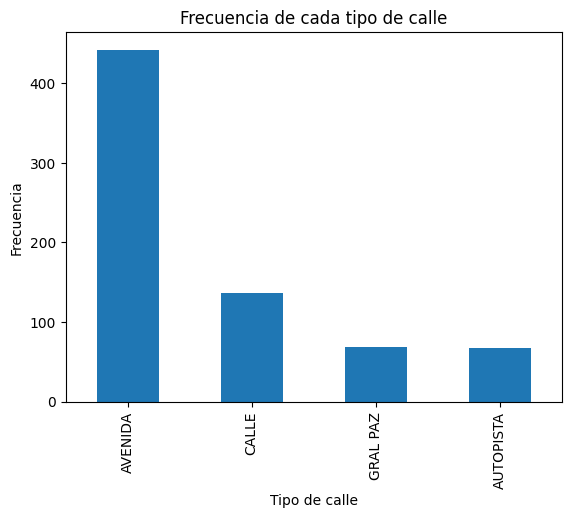

In [204]:
Homicidios['TIPO_DE_CALLE'].value_counts().plot(kind='bar')

plt.title('Frecuencia de cada tipo de calle')
plt.xlabel('Tipo de calle')
plt.ylabel('Frecuencia')

plt.show()

### Valores de **geocalización**
Para trabajar con datos de latitud y longitud en Python, generalmente se utilizan números de punto flotante (`float`). Esto se debe a que las coordenadas de latitud y longitud suelen ser números decimales.

Si estás trabajando con un DataFrame de pandas, puedes almacenar las latitudes y longitudes en columnas separadas de tipo `float`. 

Esto indica que las columnas 'latitud' y 'longitud' son de tipo `float64`, que es el tipo de dato adecuado para almacenar coordenadas de latitud y longitud.

Si necesitas realizar operaciones más complejas con las coordenadas, como calcular distancias o realizar transformaciones de coordenadas, puedes considerar el uso de bibliotecas especializadas como `geopy` o `pyproj`.

In [206]:
Homicidios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 716
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     716 non-null    object        
 1   N_VICTIMAS             716 non-null    int64         
 2   FECHA                  716 non-null    datetime64[ns]
 3   AAAA                   716 non-null    int64         
 4   MM                     716 non-null    int64         
 5   DD                     716 non-null    int64         
 6   HORA                   716 non-null    object        
 7   HH                     716 non-null    int32         
 8   LUGAR_DEL_HECHO        716 non-null    object        
 9   TIPO_DE_CALLE          716 non-null    object        
 10  Calle                  716 non-null    object        
 11  Cruce                  716 non-null    object        
 12  Dirección Normalizada  716 non-null    object        
 13  COMUNA    

In [ ]:
import matplotlib.pyplot as plt

# Create a list of months with the format "MM"
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

# Create a list of numbers representing the months
month_numbers = list(range(1, 13))

# Plot the months on the x-axis and the month numbers on the y-axis
plt.plot(month_numbers, months, marker='o')

# Set the x-axis labels
plt.xticks(month_numbers)

# Set the y-axis label
plt.ylabel('Months')

# Set the title of the graph
plt.title('Months of the Year 2020')

# Display the graph
plt.show()


### Primer **KPIs**:

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

In [212]:
# Extrae el año y el mes de la columna de fecha
Homicidios['AÑO'] = Homicidios['FECHA'].dt.year
Homicidios['MES'] = Homicidios['FECHA'].dt.month

# Filtra los datos para obtener solo los homicidios de 2020 y 2021
homicidios_2020_2021 = Homicidios[Homicidios['AÑO'].isin([2020, 2021])]

# Obtiene los meses únicos registrados en 2020 y 2021
meses_unicos = homicidios_2020_2021[['AÑO', 'MES']].drop_duplicates()

# Cuenta cuántos meses únicos hay en cada año
meses_por_año = meses_unicos['AÑO'].value_counts()

print(meses_por_año)

AÑO
2020    12
2021    12
Name: count, dtype: int64


In [213]:
meses_unicos

,AÑO,MES
539,2020,1
547,2020,2
555,2020,3
560,2020,4
563,2020,5
567,2020,6
570,2020,7
572,2020,8
578,2020,9
583,2020,10


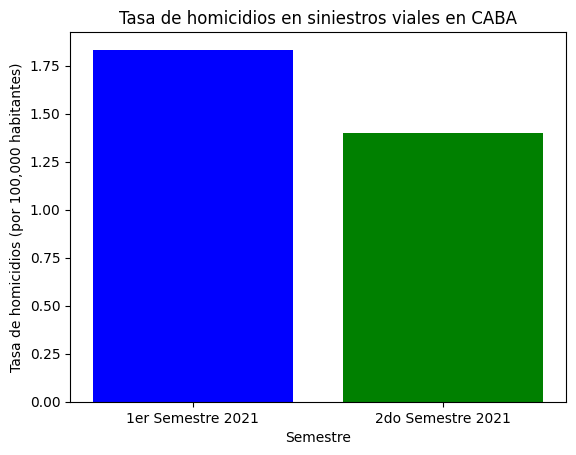

In [210]:
import matplotlib.pyplot as plt

# Crea una lista con las tasas de homicidios
tasas = [tasa_semestre_anterior, tasa_ultimo_semestre]

# Crea una lista con los nombres de los semestres
semestres = ['1er Semestre 2021', '2do Semestre 2021']

# Crea un gráfico de barras
plt.bar(semestres, tasas, color=['blue', 'green'])

# Agrega un título y etiquetas a los ejes
plt.title('Tasa de homicidios en siniestros viales en CABA')
plt.xlabel('Semestre')
plt.ylabel('Tasa de homicidios (por 100,000 habitantes)')

# Muestra el gráfico
plt.show()

### Segundo **KPIs**:

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

### Tercer **KPIS:**

**TIPS para el primer KPIs**:
### Primer **KPIs**
Para calcular el primer KPI, que es "Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior".

1. **Datos correctos y completos**: Necesitas tener datos completos y precisos de los homicidios en siniestros viales para los últimos dos semestres. Esto incluye la fecha de cada homicidio y la ubicación (para filtrar por CABA).

2. **Periodo de tiempo**: Debes tener claro el periodo de tiempo que estás analizando. En este caso, estás comparando los últimos seis meses con el semestre anterior.

3. **Cálculo de la tasa de homicidios**: Debes calcular la tasa de homicidios para cada semestre. Esto generalmente se hace contando el número de homicidios y dividiéndolo por la población total (o una muestra representativa de la población).

4. **Cálculo de la reducción**: Una vez que tienes las tasas de homicidios para cada semestre, puedes calcular la reducción en porcentaje. Asegúrate de manejar correctamente los casos en los que la tasa del semestre anterior es cero para evitar una división por cero.

5. **Visualización de los datos**: Finalmente, debes representar tus resultados de una manera que sea fácil de entender. Esto podría ser un gráfico de barras que muestre la tasa de homicidios para cada semestre, o un gráfico de líneas que muestre cómo la tasa de homicidios ha cambiado con el tiempo.

Recuerda que este KPI es un objetivo, por lo que tu trabajo es medir y reportar el progreso hacia este objetivo, no necesariamente alcanzarlo. Si la tasa de homicidios no se ha reducido en un 10%, eso es algo que deberías reportar y analizar para entender por qué no se alcanzó el objetivo.